In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 0.25
xmin, xmax = 0, 3

In [3]:
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

In [4]:
def plot45(kstar=None):
    xgrid = np.linspace(xmin, xmax, 12000)

    fig, ax = plt.subplots()

    ax.set_xlim(xmin, xmax)

    g_values = g(A, s, alpha, delta, xgrid)

    ymin, ymax = np.min(g_values), np.max(g_values)
    ax.set_ylim(ymin, ymax)

    lb = r'$g(k) = sAk^{\alpha} + (1 - \delta)k$'
    ax.plot(xgrid, g_values,  lw=2, alpha=0.6, label=lb)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    if kstar:
        fps = (kstar,)

        ax.plot(fps, fps, 'go', ms=10, alpha=0.6)

        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, kstar),
                 xycoords='data',
                 xytext=(-40, -60),
                 textcoords='offset points',
                 fontsize=14,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='upper left', frameon=False, fontsize=12)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((0, 1, 2, 3))

    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()

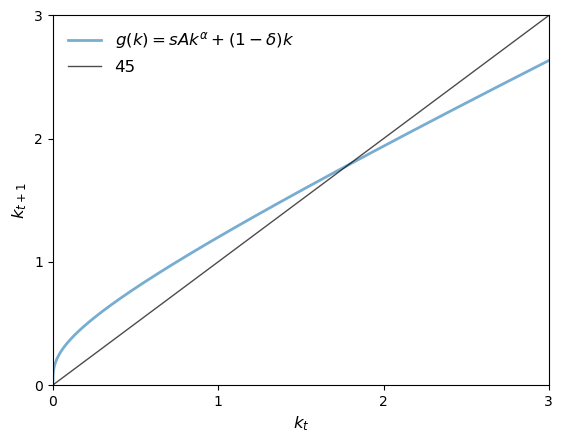

In [5]:
plot45()

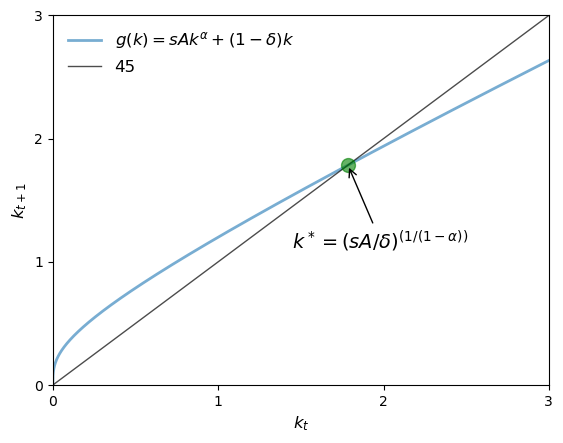

In [6]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot45(kstar)

In [7]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5

In [8]:
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

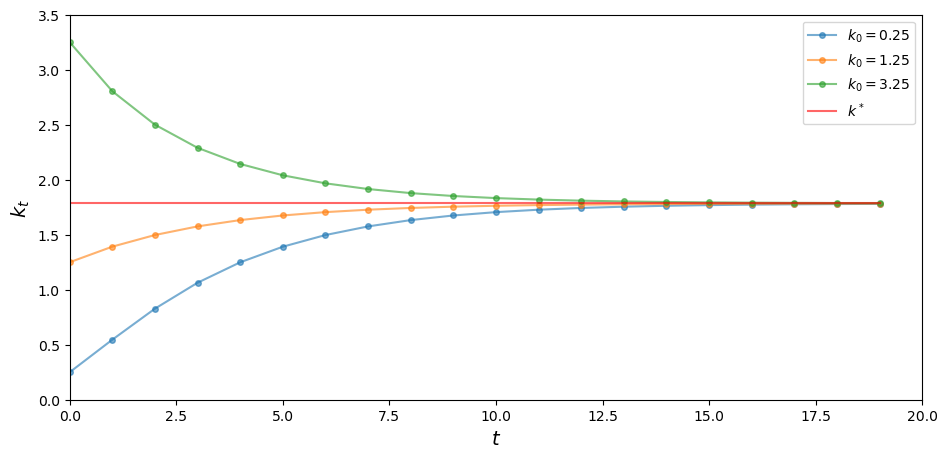

In [9]:
simulate_ts(x0, ts_length)

In [10]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

In [11]:
def g_con(A, s, alpha, delta, k):
    return A * s * k**alpha - delta * k

In [12]:
def plot_gcon(kstar=None):

    k_grid = np.linspace(0, 2.8, 10000)

    fig, ax = plt.subplots(figsize=[11, 5])
    ax.plot(k_grid, g_con(A, s, alpha, delta, k_grid), label='$g(k)$')
    ax.plot(k_grid, 0 * k_grid, label="$k'=0$")

    if kstar:
        fps = (kstar,)

        ax.plot(fps, 0, 'go', ms=10, alpha=0.6)


        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, 0),
                 xycoords='data',
                 xytext=(0, 60),
                 textcoords='offset points',
                 fontsize=12,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='lower left', fontsize=12)

    ax.set_xlabel("$k$",fontsize=10)
    ax.set_ylabel("$k'$", fontsize=10)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((-0.3, 0, 0.3))

    plt.show()

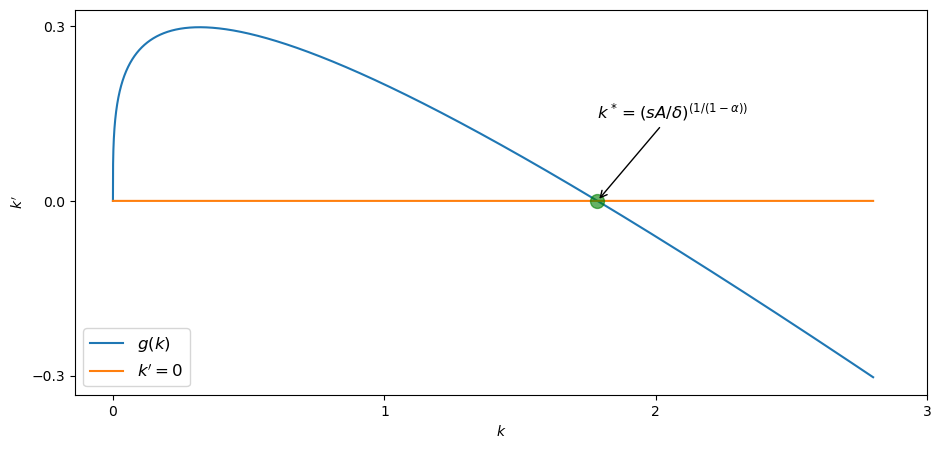

In [13]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot_gcon(kstar)

In [14]:
A = 2.0
alpha = 0.3
delta = 0.5

In [15]:
s_grid = np.linspace(0, 1, 1000)
k_star = ((s_grid * A) / delta)**(1/(1 - alpha))
c_star = (1 - s_grid) * A * k_star ** alpha

In [16]:
from scipy.optimize import minimize_scalar

In [17]:
def calc_c_star(s):
    k = ((s * A) / delta)**(1/(1 - alpha))
    return - (1 - s) * A * k ** alpha

In [18]:
return_values = minimize_scalar(calc_c_star, bounds=(0, 1))
s_star_max = return_values.x
c_star_max = -return_values.fun
print(f"Function is maximized at s = {round(s_star_max, 4)}")

Function is maximized at s = 0.3


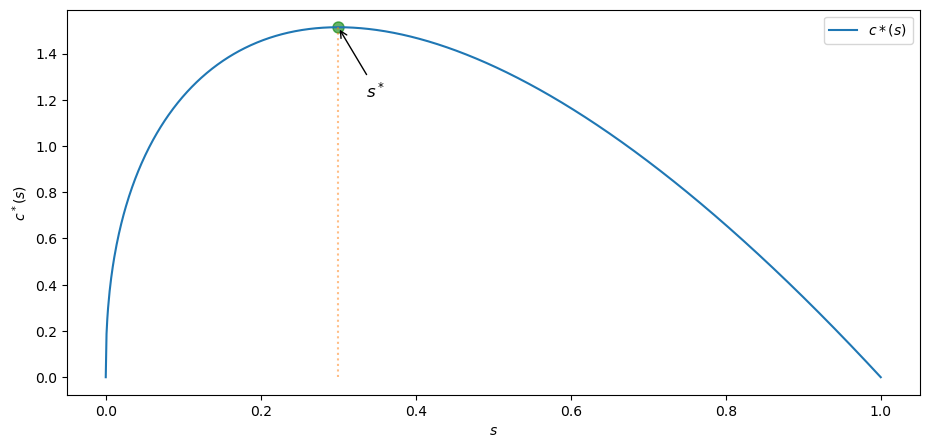

In [19]:
x_s_max = np.array([s_star_max, s_star_max])
y_s_max = np.array([0, c_star_max])

fig, ax = plt.subplots(figsize=[11, 5])

fps = (c_star_max,)

# Highlight the maximum point with a marker
ax.plot((s_star_max, ), (c_star_max,), 'go', ms=8, alpha=0.6)

ax.annotate(r'$s^*$',
         xy=(s_star_max, c_star_max),
         xycoords='data',
         xytext=(20, -50),
         textcoords='offset points',
         fontsize=12,
         arrowprops=dict(arrowstyle="->"))
ax.plot(s_grid, c_star, label=r'$c*(s)$')
ax.plot(x_s_max, y_s_max, alpha=0.5, ls='dotted')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$c^*(s)$')
ax.legend()

plt.show()

In [20]:
from sympy import solve, Symbol

In [21]:
s_symbol = Symbol('s', real=True)
k = ((s_symbol * A) / delta)**(1/(1 - alpha))
c = (1 - s_symbol) * A * k ** alpha

In [22]:
# Solve using sympy
s_star = solve(c.diff())[0]
print(f"s_star = {s_star}")

s_star = 0.300000000000000


In [23]:
# Define the constants
sig = 0.2
mu = np.log(2) - sig**2 / 2
A = 2.0
s = 0.6
alpha = 0.3
delta = 0.5
x0 = [.25, 3.25] # list of initial values used for simulation

In [24]:
def lgnorm():
    return np.exp(mu + sig * np.random.randn())

def k_next(s, alpha, delta, k):
    return lgnorm() * s * k**alpha + (1 - delta) * k

In [25]:
def ts_plot(x_values, ts_length):
    fig, ax = plt.subplots(figsize=[11, 5])
    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = k_next(s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4,
                alpha=0.6, label=r'$k_0=%g$' %x_init)

    ax.legend(loc='best', fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=12)
    ax.set_ylabel(r'$k_t$', fontsize=12)


    plt.show()

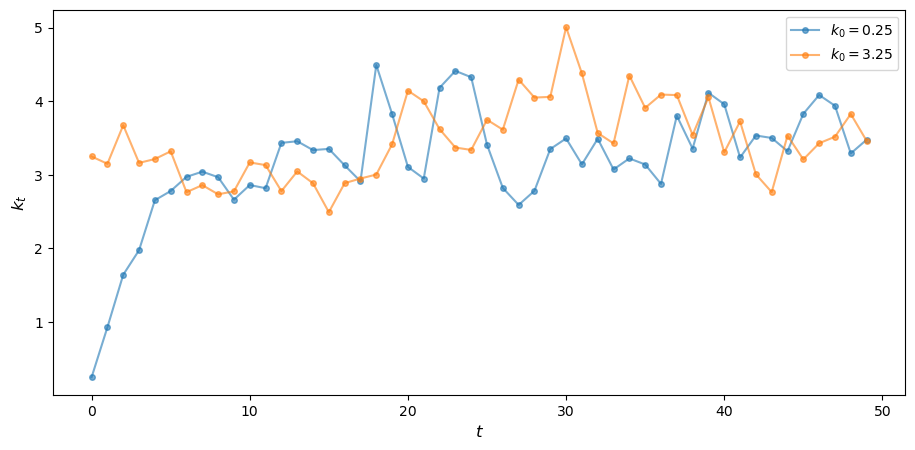

In [26]:
ts_plot(x0, 50)